In [2]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pyLDAvis]1/2 [pyLDAvis]


In [1]:
import gensim
import spacy
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import pyLDAvis.gensim
import nltk
nltk.download('stopwords')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/radiahkhan/Documents/memex/.conda/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/radiahkhan/Documents/memex/.conda/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/radiahkhan/Documents/memex/.conda/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739,

True

In [3]:
import pandas as pd
reddit_data = pd.read_csv("reddit_posts_with_comments.csv")
post_content = reddit_data["selftext"]
print(post_content)

0      Hi all! 😌\nHappy November! 🍂\n\nHere’s this mo...
1      Hello Companions!\n\nIn case you didn't know, ...
2      I’ve been noticing that the past day or two th...
3      So… according to this tester. 5.1 is in for a ...
4        He just matches my freak i love him so much😭😂\n
                             ...                        
994    I was playing around with some prompts I found...
995                                                  NaN
996    In model 5 😱. Color me shocked! Roel even went...
997    So.... I figured it was about time I introduce...
998                     Anyone else not able to use SVM?
Name: selftext, Length: 999, dtype: object


In [4]:
#cleaning the dataset 

nlp = spacy.load("en_core_web_sm")
stop_words = stopwords.words('english')

def preprocess(text):
    text = str(text).lower()  
    doc = nlp(text)
    return [
        token.lemma_
        for token in doc
        if not token.is_stop
        and not token.is_punct
        and token.is_alpha
        and len(token) > 2
    ]

post_content = post_content.dropna().astype(str).tolist()  

processed_posts = [preprocess(post) for post in post_content]



In [5]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_posts)
corpus = [dictionary.doc2bow(text) for text in processed_posts]
corpus


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 3),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 3),
  (35, 2),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 4),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1)],
 [(4, 1),
  (6, 3),
  (11, 1),
  (20, 4),
  (22, 1),
  (23, 2),
  (32, 1),

In [17]:
from gensim.models.ldamodel import LdaModel

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    passes=10,
    iterations=400,
    random_state=42
)



In [18]:
for topic_num, words in lda_model.show_topics(num_topics=10, num_words=10, formatted=False):
    print(f"Topic {topic_num}: {[word for word, prob in words]}")



Topic 0: ['like', 'companion', 'chatgpt', 'model', 'people', 'chat', 'use', 'user', 'thing', 'think']
Topic 1: ['myboyfriendisai', 'prompt', 'like', 'image', 'companion', 'love', 'create', 'share', 'want', 'feel']
Topic 2: ['love', 'like', 'house', 'time', 'companion', 'day', 'want', 'candy', 'feel', 'know']
Topic 3: ['like', 'feel', 'companion', 'know', 'want', 'relationship', 'love', 'time', 'thing', 'talk']
Topic 4: ['like', 'love', 'feel', 'want', 'know', 'real', 'companion', 'share', 'human', 'think']


In [19]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.098538  0.002774       1        1  27.893056
3     -0.050828  0.000420       2        1  26.685770
1      0.083857 -0.063055       3        1  16.786184
4      0.004021 -0.033091       4        1  16.762626
2      0.061488  0.092951       5        1  11.872365, topic_info=                 Term        Freq       Total Category  logprob  loglift
116   myboyfriendisai  180.000000  180.000000  Default  30.0000  30.0000
167              love  654.000000  654.000000  Default  29.0000  29.0000
512             image  222.000000  222.000000  Default  28.0000  28.0000
297            prompt  298.000000  298.000000  Default  27.0000  27.0000
2081            house   85.000000   85.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
143             write   30.707849  217.799788   Topic5  -5.9024   0.1719
607              life   29.577522  230.848033   Topic5  -5.9399   0.0762
137              talk   29.963070  360.587055   Topic5  -5.9270  -0.3568
297            prompt   29.240675  298.652176   Topic5  -5.9514  -0.1928
23               help   29.235058  322.662886   Topic5  -5.9516  -0.2703

[429 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
7686      4  0.911013  absorption
2327      1  0.046940   adventure
2327      2  0.140821   adventure
2327      3  0.751043   adventure
2327      5  0.046940   adventure
...     ...       ...         ...
781       2  0.189396        year
781       3  0.257578        year
781       4  0.196972        year
781       5  0.159093        year
5102      1  0.896802      zander

[874 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 5, 3])

In [22]:
def get_dominant_topic_safe(text):
    if pd.isna(text):   # if empty/null
        return None
    bow = dictionary.doc2bow(preprocess(str(text)))
    topic_probs = lda_model.get_document_topics(bow)
    if topic_probs:
        return max(topic_probs, key=lambda x: x[1])[0]
    return None

reddit_data['dominant_topic'] = reddit_data["selftext"].apply(get_dominant_topic_safe)



In [23]:
reddit_data['dominant_topic'].value_counts(dropna=False)


dominant_topic
0.0    287
3.0    269
4.0    162
1.0    157
2.0    104
NaN     20
Name: count, dtype: int64

In [26]:
topic_labels = {
    0: "AI Models (Chatgpt, Grok, Claude)",    
    1: "Arts and Creation",
    2: "Roleplay (Games, Events)",
    3: "Relationship",        
    4: "Human Feelings"
}

reddit_data['topic_labels'] = reddit_data['dominant_topic'].map(topic_labels)

In [27]:
reddit_data['topic_labels'].head()
reddit_data['topic_labels'].value_counts(dropna=False)


topic_labels
AI Models (Chatgpt, Grok, Claude)    287
Relationship                         269
Human Feelings                       162
Arts and Creation                    157
Roleplay (Games, Events)             104
NaN                                   20
Name: count, dtype: int64

In [31]:
reddit_data['topic_label'] = reddit_data['dominant_topic'].map(topic_labels)


In [29]:
import matplotlib.pyplot as plt

import seaborn as sns


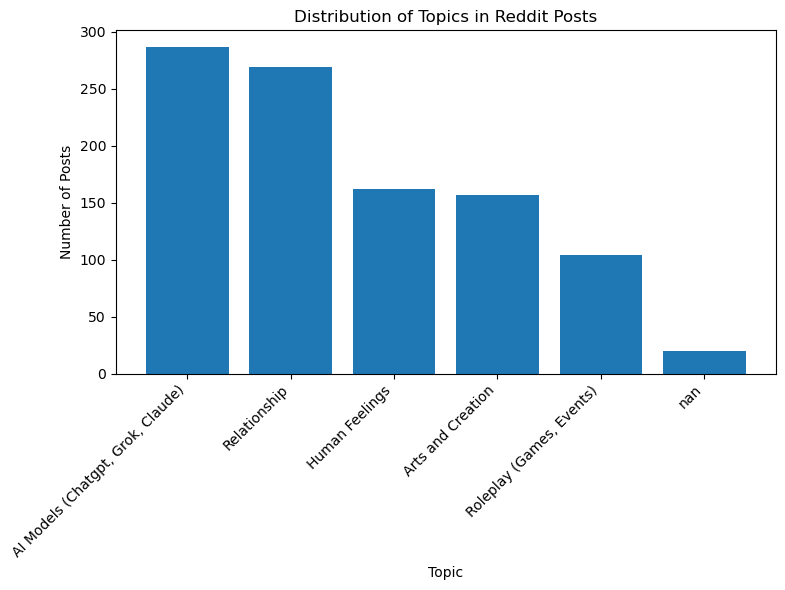

In [37]:
import matplotlib.pyplot as plt

topic_counts = reddit_data['topic_labels'].value_counts(dropna=False)

plt.figure(figsize=(8, 6))
plt.bar(topic_counts.index.astype(str), topic_counts.values) 
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Topics in Reddit Posts')
plt.xlabel('Topic')
plt.ylabel('Number of Posts')
plt.tight_layout()  
plt.savefig("topic_distribution.png", dpi=300, bbox_inches='tight')
plt.show() 
plt.close()


